In [1]:
from utils import create_mutation_matrix
from celural_automata_evolution import CellularAutomataEvolution
import numpy as np
from matplotlib import pyplot as plt

SEED = 1422

SEED = 42


# Parameters
#ALL RULES used to simulate donation game, calculate mutation matrix
RULES = [153, 219, 195, 251, 243, 187, 50, 48, 34, 90, 72, 18]
mutation_matrix = create_mutation_matrix(RULES)
RULES.sort()

ev_generations = 1000


PROPORTIONS = [ 0.08, 0.09, 0.08, 0.09, 0.08, 0.08, 0.09, 0.08, 0.08, 0.08, 0.08, 0.09]
RULES_AGENT = RULES

#CASE when two types of agents are on the grid
#PROPORTIONS = [0.99, 0.01]
#RULES_AGENT = [50, 72]

SIZE = 100  # Number of cells per row
STEPS = 300  # Number of time steps

rules_as_agents_list = CellularAutomataEvolution.generate_integer_list(values= RULES_AGENT , proportions=PROPORTIONS, total_length= SIZE)

#rules_as_agents_list = generate_integer_list(values= RULES, proportions=[ 1/len(RULES) for rule in RULES], total_length= SIZE)

#rules_as_agents_list = [50 for i in range(0, SIZE)]

INIT_TYPE = "random"  # "single" for one black cell, "random" for random pattern
SHUFFLE_COLUMNS = True #False  # Set to True to shuffle columns
#SHUFFLE_COLUMNS = False  # Set to True to shuffle columns
SHUFFLE_PERCENTAGE = 2  # Percentage of columns to shuffle

SLOW_WALKING = False
SLOW_WALKING = True

PERCEPTION_NOISE = False
#PERCEPTION_NOISE = True
#e_P w publikacji
perception_noise_rand_treshold = 0.05

ACTION_NOISE = False
#ACTION_NOISE = True
#e_A w publikacji
action_noise_rand_treshold = 0.05


#Tirnes parameter sets agent NOT TO DONATE EVERY n ITERATIONS WHEN AGENT DONATED IN LAST
#n-1 ITERATIONS - lub jakos tak

#SET in var tirness_iteration
TIRNESS = True
TIRNESS = False
tireness_iteration = 2

print(rules_as_agents_list)
#print(set(rules_as_agents_list))

evolution = True
#evolution = False

#after selected number of STEPS in const STEPS
#the every agnet can mutate with chance below
#mutiation is govern by probability matrix
evolution_chance = 0.001


history_donations_vs_rule_vs_evolution_step = []
history_number_of_agents_vs_evolution_step = {}

for rule in RULES:
  history_number_of_agents_vs_evolution_step[rule]=[]

cellular_automata_evolution = CellularAutomataEvolution(size=SIZE, seed=SEED)

for evolution_step in range(ev_generations):

  #####print(rules_as_agents_list)
  #additional prameters are returned here, last one show position of agetns following a particular rule
  agent_history, grid_history, donation_sum, history_doniations_for_recipients, rules_as_agents_after_generation = cellular_automata_evolution.generate_automaton(
                                                            STEPS, INIT_TYPE,
                                                            SHUFFLE_COLUMNS, SHUFFLE_PERCENTAGE,
                                                            SLOW_WALKING,
                                                            PERCEPTION_NOISE,
                                                            perception_noise_rand_treshold,
                                                            ACTION_NOISE,
                                                            action_noise_rand_treshold,
                                                            rules_as_agents_list,
                                                            TIRNESS,
                                                            tireness_iteration
                                                            )

  SEED = SEED + 1

  #plot_automaton(history_2)
  ### print("rules_as_agents_after_generation ", rules_as_agents_after_generation)
  #np.sum(history_doniations_for_recipients, axis = 0).astype(int)

  #Count agents following a particular rule
  for rule in RULES:
    history_number_of_agents_vs_evolution_step[rule].append( rules_as_agents_after_generation.count(rule) )

  donations_vs_rule_dict = {}
  for rule in set(rules_as_agents_after_generation):
    #print(rule)
    donations_vs_rule_dict[rule]=0

  donations = np.sum(history_doniations_for_recipients,axis=0)

  for i, rule in enumerate(rules_as_agents_after_generation):
    donations_vs_rule_dict[rule] += float(donations[i])

  #####print(evolution_step, donations_vs_rule_dict)

  #print('rules_as_agents_after_generation', rules_as_agents_after_generation)

  donations_sum = sum([donations_vs_rule_dict[rule] for rule in donations_vs_rule_dict.keys() ])
  normalized_donations_vs_rule_dict = {}

  for key in donations_vs_rule_dict.keys():
    normalized_donations_vs_rule_dict[key] = donations_vs_rule_dict[key]/donations_sum
  #print('normalized_donations_vs_rule_dict', normalized_donations_vs_rule_dict)

  #####print(evolution_step, normalized_donations_vs_rule_dict)

  history_donations_vs_rule_vs_evolution_step.append(normalized_donations_vs_rule_dict)

  #print(evolution_step, history_donations_vs_rule_vs_evolution_step)

  rules2 = list(donations_vs_rule_dict.keys())
  #rules2.sort()
  #####print(rules2)

  #print('rules2', rules2)

  proportions = [ normalized_donations_vs_rule_dict[key] for key in normalized_donations_vs_rule_dict.keys()]
  #print(evolution_step, rules)
  #####print('proportions', proportions)
  rules_as_agents_list = CellularAutomataEvolution.generate_integer_list( rules2, proportions , SIZE)
  #print(rules_as_agents_list)

  #EVOLUTION
  for i, agent in enumerate(rules_as_agents_list):
    chance = np.random.random()
    if evolution and chance < evolution_chance:
      rule_idx = RULES.index(agent)
      #print("RULES ", RULES)
      #print(rule_idx, evolution_chance, chance )
      probabilities = mutation_matrix[rule_idx]
      #print("prob ",probabilities)
      new_rule = np.random.choice(RULES, p=probabilities)
      #print("new rule ", new_rule)
      #print(bin_rule_as_agents[i])
      #bin_rule_as_agents[i] = get_rule_binary(new_rule)

      #if new_rule != 251:
      rules_as_agents_list[i] = int(new_rule)
      #####print(i, new_rule)
      #print( bin_rule_as_agents[i])
  ### print('rules_as_agents_list', rules_as_agents_list)

[50, 251, 90, 251, 72, 243, 48, 251, 18, 153, 195, 219, 72, 195, 195, 243, 187, 187, 72, 243, 18, 72, 34, 34, 251, 50, 90, 34, 50, 153, 251, 72, 195, 90, 243, 50, 187, 18, 219, 18, 153, 219, 18, 90, 50, 50, 48, 34, 34, 195, 195, 219, 48, 48, 50, 48, 153, 187, 90, 219, 72, 50, 34, 219, 243, 90, 153, 153, 72, 153, 187, 18, 18, 195, 48, 219, 243, 34, 243, 34, 90, 90, 187, 50, 72, 251, 251, 219, 18, 251, 195, 187, 153, 34, 48, 243, 48, 251, 187, 153]


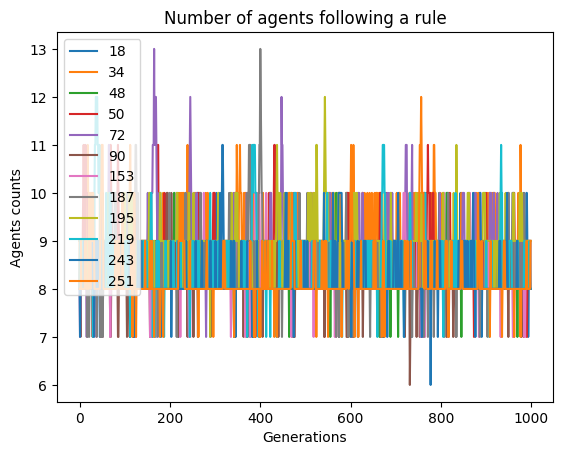

SWAPPING  True 2
Directed motion  True
Perception noise False 0.05
Action noise False 0.05
Tirness False 2
Evolution chance 0.001


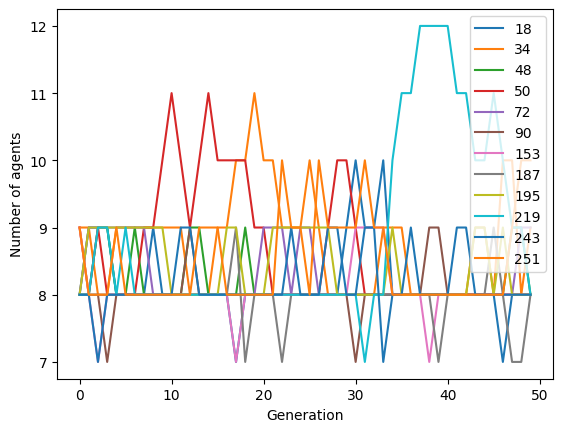

In [2]:
dict_to_plots={}
for key in RULES:
  dict_to_plots[key] = []

for item in history_donations_vs_rule_vs_evolution_step:
  for key in RULES:
    if key in item.keys():
      dict_to_plots[key].append(item[key])
    else:
      dict_to_plots[key].append(0)

max_points = ev_generations -1

# for key in RULES:
#   #plt.scatter([i for i in range(max_points)],dict_to_plots[key][-max_points:], s=3)
#   plt.plot(dict_to_plots[key][-max_points:], label=key)
# plt.legend()
# plt.show()

for key in RULES:
  #plt.scatter([i for i in range(max_points)],dict_to_plots[key][-max_points:], s=3)
  plt.title('Number of agents following a rule')
  plt.ylabel('Agents counts')
  plt.xlabel('Generations')
  plt.plot(history_number_of_agents_vs_evolution_step[key][-max_points:], label=key)
plt.legend()
plt.show()
print('SWAPPING ',SHUFFLE_COLUMNS, SHUFFLE_PERCENTAGE)
print('Directed motion ', SLOW_WALKING)
print('Perception noise', PERCEPTION_NOISE, perception_noise_rand_treshold )
print('Action noise', ACTION_NOISE, action_noise_rand_treshold )
print('Tirness', TIRNESS , tireness_iteration  )
print('Evolution chance', evolution_chance )

from_iter = 0
to_iter = 50
for key in RULES:
  #plt.scatter([i for i in range(max_points)],dict_to_plots[key][-max_points:], s=3)
  #plt.title('Number of agents following a rule')
  plt.ylabel('Number of agents')
  plt.xlabel('Generation')
  plt.plot([i for i in range(from_iter,to_iter)],
           history_number_of_agents_vs_evolution_step[key][from_iter:to_iter], label=key)
  plt.legend()
plt.show()